In [2]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import plotly.graph_objects as go
import plotly.offline as pyo
from pathlib import Path

#Request for the json file of the defenders' data -> obtained on postman and adapting the url to increase the limit and get all players data
#Also we filtered only the defenders with over 10 matches and normalized the stats by 90 minutes played to each player in order to compare properly
#We had to split the requests in 2 parts because the limit of the API is 100 per request

url = "https://api.sofascore.com/api/v1/unique-tournament/325/season/27591/statistics?limit=100&order=-rating&accumulation=per90&fields=tackles%2Cinterceptions%2CbigChancesCreated%2CaccurateCrossesPercentage%2CdribbledPast%2CblockedShots&filters=appearances.GT.20%2Cposition.in.D"

payload={}
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:83.0) Gecko/20100101 Firefox/83.0',
  'Accept': '*/*',
  'Accept-Language': 'pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3',
  'Referer': 'https://www.sofascore.com/tournament/football/brazil/brasileiro-serie-a/325',
  'Origin': 'https://www.sofascore.com',
  'Connection': 'keep-alive',
  'TE': 'Trailers',
  'Cookie': '__cfduid=d9abe87eb214a7e6080a15fbdbd7055c01619186545'
}

r1 = requests.get(url, headers = headers)
defender_data = r1.json()
df_defenders1 = pd.json_normalize(defender_data['results'])
df_defenders1.head(100)

url2 = "https://api.sofascore.com/api/v1/unique-tournament/325/season/27591/statistics?limit=100&order=-rating&offset=100&accumulation=per90&fields=tackles%2Cinterceptions%2CbigChancesCreated%2CaccurateCrossesPercentage%2CdribbledPast%2CblockedShots&filters=appearances.GT.20%2Cposition.in.D"
payload={}
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:83.0) Gecko/20100101 Firefox/83.0',
  'Accept': '*/*',
  'Accept-Language': 'pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3',
  'Referer': 'https://www.sofascore.com/tournament/football/brazil/brasileiro-serie-a/325',
  'Origin': 'https://www.sofascore.com',
  'Connection': 'keep-alive',
  'TE': 'Trailers',
  'Cookie': '__cfduid=d9abe87eb214a7e6080a15fbdbd7055c01619186545'
}

r2 = requests.get(url2, headers = headers)
defender_data = r2.json()
df_defenders2 = pd.json_normalize(defender_data['results'])

df_defenders = df_defenders1.append(df_defenders2)
df_defenders

,tackles,interceptions,bigChancesCreated,accurateCrossesPercentage,dribbledPast,blockedShots,player.name,player.slug,player.userCount,player.id,team.name,team.slug,team.shortName,team.userCount,team.type,team.id,team.teamColors.primary,team.teamColors.secondary,team.teamColors.text
0,2.63,1.88,0.30,20.14,0.66,0.07,Filipe Luís,filipe-luis,2743,26029,Flamengo,flamengo,Flamengo,0,0,5981,#52b030,#52b030,#ffffff
1,1.46,1.26,0.00,0.00,0.41,0.07,Pedro Henrique,pedro-henrique,313,551774,Athletico Paranaense,athletico-paranaense,Athletico Paranaense,0,0,1967,#52b030,#52b030,#ffffff
2,1.30,1.10,0.25,24.38,0.56,0.76,Guilherme Arana,guilherme-arana,1106,599684,Atlético Mineiro,atletico-mineiro,Atlético Mineiro,0,0,1977,#52b030,#52b030,#ffffff
3,1.10,1.16,0.27,20.97,0.48,0.30,Reinaldo,reinaldo,773,243109,São Paulo,sao-paulo,São Paulo,0,0,1981,#52b030,#52b030,#ffffff
4,0.67,1.48,0.00,0.00,0.35,0.14,Thiago Heleno,thiago-heleno,151,33106,Athletico Paranaense,athletico-paranaense,Athletico Paranaense,0,0,1967,#52b030,#52b030,#ffffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.99,1.55,0.07,17.65,0.63,0.11,Henrique,henrique,174,336851,Vasco da Gama,vasco-da-gama,Vasco da Gama,0,0,1974,#52b030,#52b030,#ffffff
80,2.09,1.96,0.13,27.78,0.65,0.20,Igor Vinícius,igor-vinicius,364,840119,São Paulo,sao-paulo,São Paulo,0,0,1981,#52b030,#52b030,#ffffff
81,1.32,1.44,0.00,25.00,1.74,0.42,Rafael Forster,rafael-forster,81,795298,Botafogo,botafogo,Botafogo,0,0,1958,#52b030,#52b030,#ffffff
82,1.62,0.73,0.05,30.77,0.21,0.05,Heron,heron,18,992611,Goiás,goias,Goiás,0,0,1960,#52b030,#52b030,#ffffff


In [3]:
#Here we are getting more stats columns as the API limits us to 6 fields per request

url = "https://api.sofascore.com/api/v1/unique-tournament/325/season/27591/statistics?limit=100&order=-rating&accumulation=per90&fields=groundDuelsWonPercentage%2CaerialDuelsWonPercentage%2Cfouls%2CpossessionLost%2CaccuratePassesPercentage%2CaccurateLongBallsPercentage&filters=appearances.GT.20%2Cposition.in.D"

payload={}
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:83.0) Gecko/20100101 Firefox/83.0',
  'Accept': '*/*',
  'Accept-Language': 'pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3',
  'Referer': 'https://www.sofascore.com/tournament/football/brazil/brasileiro-serie-a/325',
  'Origin': 'https://www.sofascore.com',
  'Connection': 'keep-alive',
  'TE': 'Trailers',
  'Cookie': '__cfduid=d9abe87eb214a7e6080a15fbdbd7055c01619186545'
}

r3 = requests.get(url, headers = headers)
defender_data_comp = r3.json()
df_defenders_comp1 = pd.json_normalize(defender_data_comp['results'])

url = "https://api.sofascore.com/api/v1/unique-tournament/325/season/27591/statistics?limit=100&offset=100order=-rating&accumulation=per90&fields=groundDuelsWonPercentage%2CaerialDuelsWonPercentage%2Cfouls%2CpossessionLost%2CaccuratePassesPercentage%2CaccurateLongBallsPercentage&filters=appearances.GT.20%2Cposition.in.D"

payload={}
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:83.0) Gecko/20100101 Firefox/83.0',
  'Accept': '*/*',
  'Accept-Language': 'pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3',
  'Referer': 'https://www.sofascore.com/tournament/football/brazil/brasileiro-serie-a/325',
  'Origin': 'https://www.sofascore.com',
  'Connection': 'keep-alive',
  'TE': 'Trailers',
  'Cookie': '__cfduid=d9abe87eb214a7e6080a15fbdbd7055c01619186545'
}

r4 = requests.get(url, headers = headers)
defender_data_comp = r4.json()
df_defenders_comp2 = pd.json_normalize(defender_data_comp['results'])

df_defenders_comp = df_defenders_comp1.append(df_defenders_comp2)
df_defenders_comp

,groundDuelsWonPercentage,aerialDuelsWonPercentage,fouls,possessionLost,accuratePassesPercentage,accurateLongBallsPercentage,player.name,player.slug,player.userCount,player.id,team.name,team.slug,team.shortName,team.userCount,team.type,team.id,team.teamColors.primary,team.teamColors.secondary,team.teamColors.text
0,63.27,49.23,1.55,13.98,88.43,64.81,Filipe Luís,filipe-luis,2743,26029,Flamengo,flamengo,Flamengo,0,0,5981,#52b030,#52b030,#ffffff
1,68.22,68.55,0.65,7.75,88.13,66.43,Pedro Henrique,pedro-henrique,313,551774,Athletico Paranaense,athletico-paranaense,Athletico Paranaense,0,0,1967,#52b030,#52b030,#ffffff
2,53.20,46.48,1.35,16.96,86.21,50.77,Guilherme Arana,guilherme-arana,1106,599684,Atlético Mineiro,atletico-mineiro,Atlético Mineiro,0,0,1977,#52b030,#52b030,#ffffff
3,52.36,61.11,1.16,18.21,82.51,50.38,Reinaldo,reinaldo,773,243109,São Paulo,sao-paulo,São Paulo,0,0,1981,#52b030,#52b030,#ffffff
4,57.53,76.23,0.77,8.76,88.91,67.82,Thiago Heleno,thiago-heleno,151,33106,Athletico Paranaense,athletico-paranaense,Athletico Paranaense,0,0,1967,#52b030,#52b030,#ffffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,50.00,51.32,1.73,10.60,84.47,34.25,Henrique,henrique,174,336851,Vasco da Gama,vasco-da-gama,Vasco da Gama,0,0,1974,#52b030,#52b030,#ffffff
80,46.15,45.24,2.55,14.91,85.74,55.88,Igor Vinícius,igor-vinicius,364,840119,São Paulo,sao-paulo,São Paulo,0,0,1981,#52b030,#52b030,#ffffff
81,45.37,47.62,1.26,11.15,81.09,61.39,Rafael Forster,rafael-forster,81,795298,Botafogo,botafogo,Botafogo,0,0,1958,#52b030,#52b030,#ffffff
82,59.34,65.38,1.31,10.18,77.38,40.00,Heron,heron,18,992611,Goiás,goias,Goiás,0,0,1960,#52b030,#52b030,#ffffff


In [4]:
df_defenders = df_defenders.merge(df_defenders_comp, left_on='player.id', right_on='player.id', how = 'inner')
print(df_defenders.columns)

Index(['tackles', 'interceptions', 'bigChancesCreated',
       'accurateCrossesPercentage', 'dribbledPast', 'blockedShots',
       'player.name_x', 'player.slug_x', 'player.userCount_x', 'player.id',
       'team.name_x', 'team.slug_x', 'team.shortName_x', 'team.userCount_x',
       'team.type_x', 'team.id_x', 'team.teamColors.primary_x',
       'team.teamColors.secondary_x', 'team.teamColors.text_x',
       'groundDuelsWonPercentage', 'aerialDuelsWonPercentage', 'fouls',
       'possessionLost', 'accuratePassesPercentage',
       'accurateLongBallsPercentage', 'player.name_y', 'player.slug_y',
       'player.userCount_y', 'team.name_y', 'team.slug_y', 'team.shortName_y',
       'team.userCount_y', 'team.type_y', 'team.id_y',
       'team.teamColors.primary_y', 'team.teamColors.secondary_y',
       'team.teamColors.text_y'],
      dtype='object')


In [5]:
cols = ['player.userCount_x', 'player.slug_x', 'player.id', 'team.slug_x', 'team.shortName_x',
       'team.type_x', 'team.id_x', 'team.teamColors.primary_x', 'team.teamColors.secondary_x',
       'team.teamColors.text_x', 'player.name_y', 'player.slug_y', 'player.userCount_y', 'team.name_y',
       'team.slug_y', 'team.shortName_y', 'team.userCount_y', 'team.type_y',
       'team.id_y', 'team.teamColors.primary_y', 'team.teamColors.secondary_y',
       'team.teamColors.text_y','team.userCount_x']

df_defenders.drop(columns=cols,inplace=True)
df_defenders.reset_index(drop=True)

df_defenders.head(20)

,tackles,interceptions,bigChancesCreated,accurateCrossesPercentage,dribbledPast,blockedShots,player.name_x,team.name_x,groundDuelsWonPercentage,aerialDuelsWonPercentage,fouls,possessionLost,accuratePassesPercentage,accurateLongBallsPercentage
0,2.63,1.88,0.30,20.14,0.66,0.07,Filipe Luís,Flamengo,63.27,49.23,1.55,13.98,88.43,64.81
1,1.46,1.26,0.00,0.00,0.41,0.07,Pedro Henrique,Athletico Paranaense,68.22,68.55,0.65,7.75,88.13,66.43
2,1.30,1.10,0.25,24.38,0.56,0.76,Guilherme Arana,Atlético Mineiro,53.20,46.48,1.35,16.96,86.21,50.77
3,1.10,1.16,0.27,20.97,0.48,0.30,Reinaldo,São Paulo,52.36,61.11,1.16,18.21,82.51,50.38
4,0.67,1.48,0.00,0.00,0.35,0.14,Thiago Heleno,Athletico Paranaense,57.53,76.23,0.77,8.76,88.91,67.82
5,1.94,1.78,0.13,31.87,0.68,0.16,Fagner,Corinthians,52.79,32.88,1.52,19.07,76.28,42.33
6,1.29,1.39,0.03,0.00,0.56,0.07,Sabino,Coritiba,70.27,60.00,0.40,9.02,83.53,49.10
7,0.71,1.82,0.00,0.00,0.46,0.12,Réver,Atlético Mineiro,56.16,64.60,0.62,9.25,90.72,56.00
8,2.10,1.24,0.12,29.32,0.49,0.12,Moisés,Internacional,49.19,65.96,2.31,16.09,81.63,46.97
9,1.93,1.23,0.22,27.00,0.70,0.44,Victor Luis,Botafogo,63.01,56.36,0.88,12.33,85.03,60.92


In [6]:
df_defenders = df_defenders[['player.name_x','team.name_x','tackles','interceptions', 'accurateCrossesPercentage','bigChancesCreated','dribbledPast','blockedShots','groundDuelsWonPercentage','aerialDuelsWonPercentage','fouls','possessionLost','accuratePassesPercentage', 'accurateLongBallsPercentage' ]]
df_defenders = df_defenders.rename(columns = {'player.name_x':'player', 'team.name_x':'team' })
df_defenders

,player,team,tackles,interceptions,accurateCrossesPercentage,bigChancesCreated,dribbledPast,blockedShots,groundDuelsWonPercentage,aerialDuelsWonPercentage,fouls,possessionLost,accuratePassesPercentage,accurateLongBallsPercentage
0,Filipe Luís,Flamengo,2.63,1.88,20.14,0.30,0.66,0.07,63.27,49.23,1.55,13.98,88.43,64.81
1,Pedro Henrique,Athletico Paranaense,1.46,1.26,0.00,0.00,0.41,0.07,68.22,68.55,0.65,7.75,88.13,66.43
2,Guilherme Arana,Atlético Mineiro,1.30,1.10,24.38,0.25,0.56,0.76,53.20,46.48,1.35,16.96,86.21,50.77
3,Reinaldo,São Paulo,1.10,1.16,20.97,0.27,0.48,0.30,52.36,61.11,1.16,18.21,82.51,50.38
4,Thiago Heleno,Athletico Paranaense,0.67,1.48,0.00,0.00,0.35,0.14,57.53,76.23,0.77,8.76,88.91,67.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Henrique,Vasco da Gama,0.99,1.55,17.65,0.07,0.63,0.11,50.00,51.32,1.73,10.60,84.47,34.25
80,Igor Vinícius,São Paulo,2.09,1.96,27.78,0.13,0.65,0.20,46.15,45.24,2.55,14.91,85.74,55.88
81,Rafael Forster,Botafogo,1.32,1.44,25.00,0.00,1.74,0.42,45.37,47.62,1.26,11.15,81.09,61.39
82,Heron,Goiás,1.62,0.73,30.77,0.05,0.21,0.05,59.34,65.38,1.31,10.18,77.38,40.00


In [7]:
#checking matplotlib version
mpl.__version__

'3.4.2'

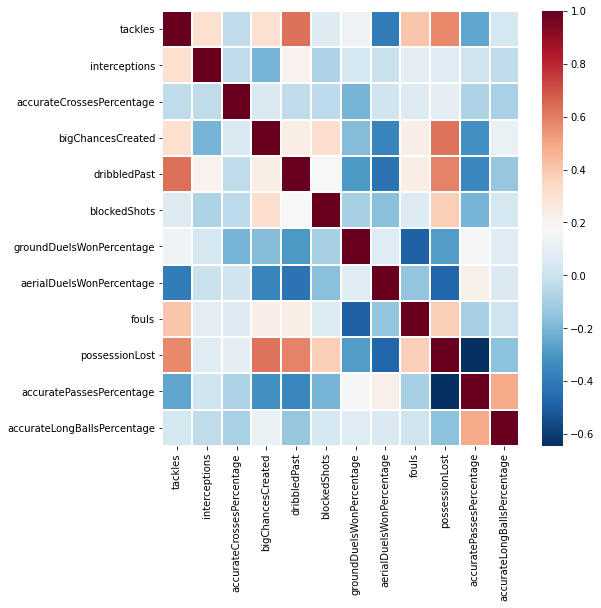

In [8]:
#correlation matrix -> red = higher positive correlation between variables, blue = higher negative correlation between variables
corr_matrix = df_defenders.corr()
fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, linewidths=.3, cmap = 'RdBu_r')
fig.savefig('corrmatrixdefenders.png')

In [9]:
#Adding the fonts to system's fonts
font_dir  = ['/Users/bcpython/Documents/Python Projects/Brasileirao Stats Analysis/fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

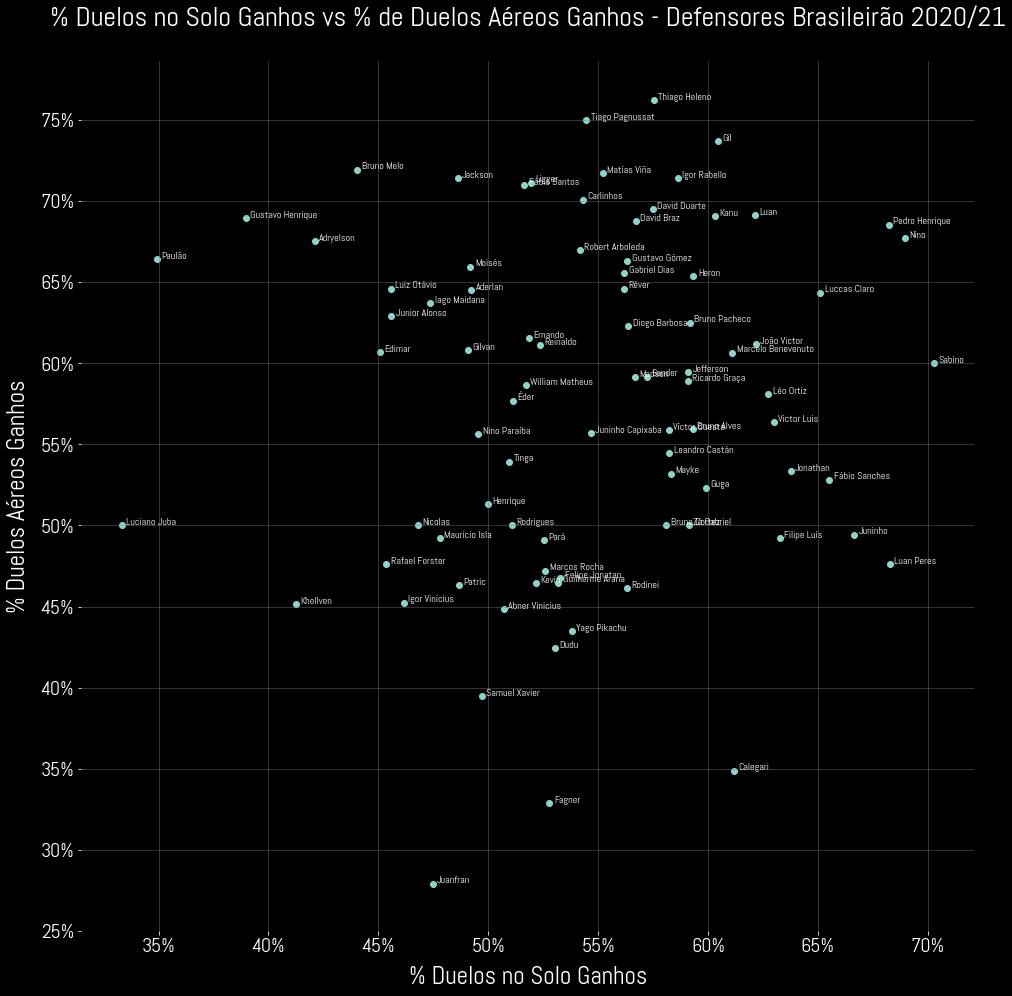

In [30]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_defenders['groundDuelsWonPercentage'],df_defenders['aerialDuelsWonPercentage'])

#Annotation on the scatter points
for i in range (df_defenders.shape[0]):
    plt.text(x=df_defenders.groundDuelsWonPercentage[i] + 0.2,
             y=df_defenders.aerialDuelsWonPercentage[i] + 0.03,
             s = df_defenders.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.yaxis.set_ticks(np.arange(25,80,5))
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'% Duelos no Solo Ganhos vs % de Duelos Aéreos Ganhos - Defensores Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='% Duelos no Solo Ganhos', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='% Duelos Aéreos Ganhos', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('DuelosnochaovsDuelosAereos.png')

C:\Users\bcpython\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



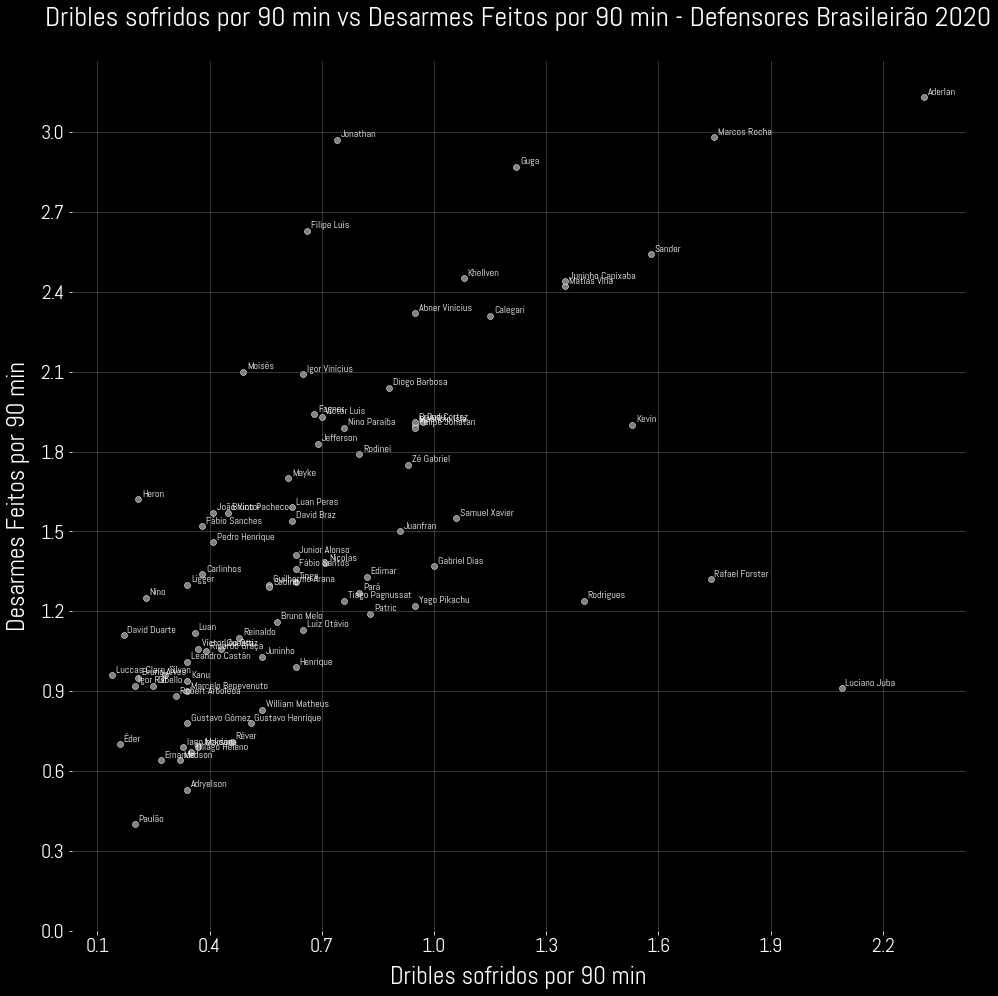

In [31]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))

#Defining the scatter
sns.scatterplot(df_defenders['dribbledPast'],df_defenders['tackles'], color='gray')

#Annotation on the scatter points
for i in range (df_defenders.shape[0]):
    plt.text(x=df_defenders.dribbledPast[i] + 0.01,
             y=df_defenders.tackles[i] + 0.01,
             s = df_defenders.player[i])
    
#Grid and axis properties    
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_ticks(np.arange(0.1,2.4,.3))
ax.yaxis.set_ticks(np.arange(0,3.28,.3))
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

#Texts
plt.title('Dribles sofridos por 90 min vs Desarmes Feitos por 90 min - Defensores Brasileirão 2020/21', fontsize = 28, pad = 35)
plt.xlabel(xlabel='Dribles sofridos por 90 min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Desarmes Feitos por 90 min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('DriblesSofridosvsDesarmes.png')

C:\Users\bcpython\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



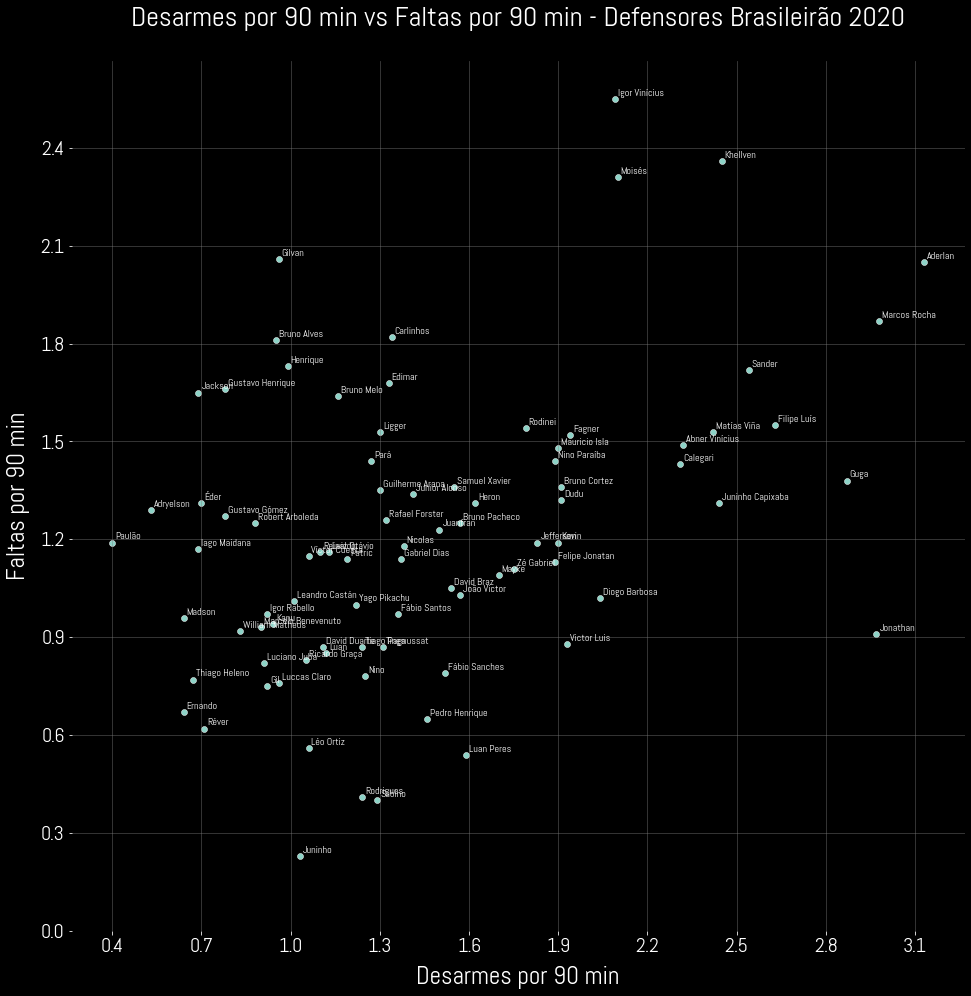

In [32]:
#Defining style and properties
fig,ax = plt.subplots(figsize=(16,16))

#Defining the scatter
sns.scatterplot(df_defenders['tackles'],df_defenders['fouls'])

#Annotation on the scatter points
for i in range (df_defenders.shape[0]):
    plt.text(x=df_defenders.tackles[i] + 0.01,
             y=df_defenders.fouls[i] + 0.01,
             s = df_defenders.player[i])
    
#Grid and axis properties  
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_ticks(np.arange(0.4,3.3,.3))
ax.yaxis.set_ticks(np.arange(0,2.6,.3))
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

#Texts
plt.title('Desarmes por 90 min vs Faltas por 90 min - Defensores Brasileirão 2020/21', fontsize = 28, pad = 35)
plt.xlabel(xlabel='Desarmes por 90 min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Faltas por 90 min', fontsize = 25, labelpad = 10)

#Show
plt.show()

#Save
fig.savefig('DesarmesvsFaltas.png')

C:\Users\bcpython\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



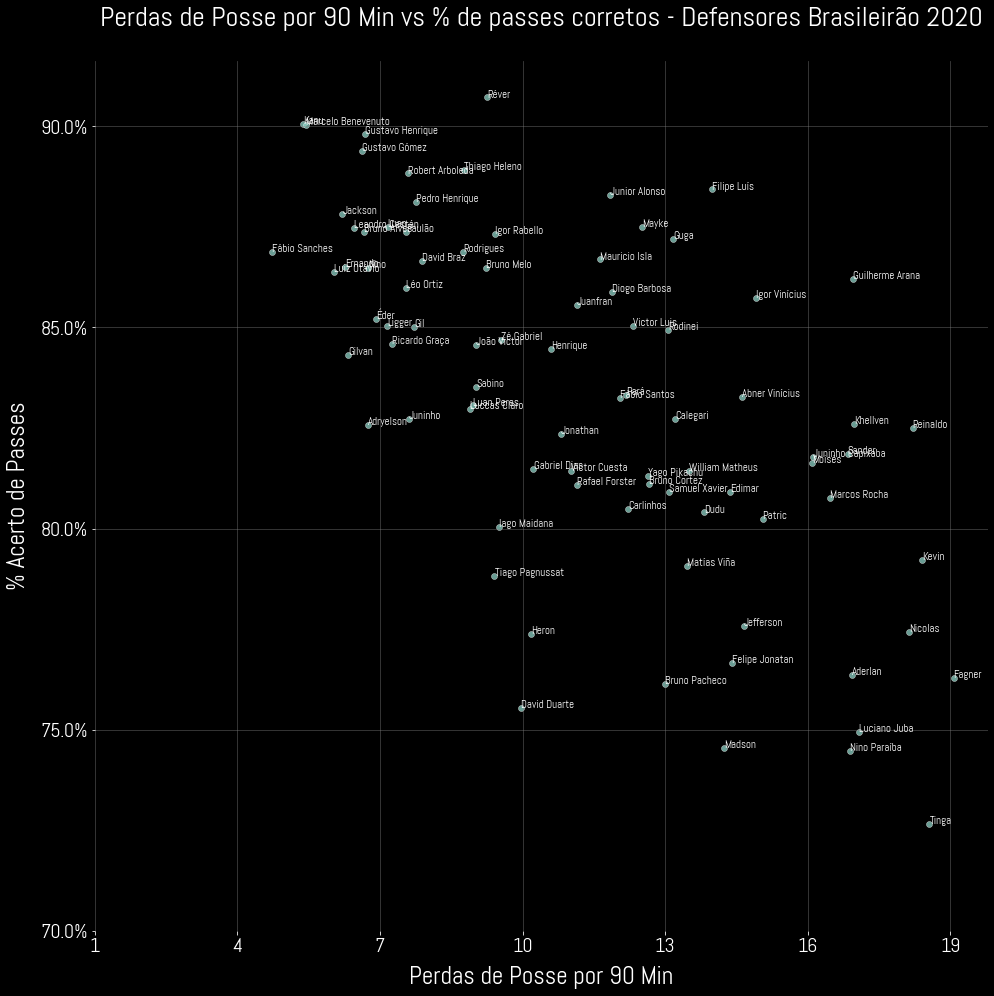

In [33]:
#Defining style and properties
fig,ax = plt.subplots(figsize=(16,16))

#Defining the scatter
sns.scatterplot(df_defenders['possessionLost'],df_defenders['accuratePassesPercentage'], alpha = 0.75)

#Annotation on the scatter points
for i in range (df_defenders.shape[0]):
    plt.text(x=df_defenders.possessionLost[i] + 0.001,
             y=df_defenders.accuratePassesPercentage[i] + 0.001,
             s = df_defenders.player[i],
             fontsize = 11)

#Grid and axis properties   
ax.yaxis.set_ticks(np.arange(70,95,5))
ax.xaxis.set_ticks(np.arange(1,21,3))
sns.despine(left = True, bottom = True)
plt.grid(alpha = 0.5, color = 'gray')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

#Texts
plt.title('Perdas de Posse por 90 Min vs % de passes corretos - Defensores Brasileirão 2020/21', fontsize = 28, pad=35)
plt.xlabel(xlabel='Perdas de Posse por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='% Acerto de Passes', fontsize = 25, labelpad = 10)
#Show
plt.show()

#Save
fig.savefig('PerdaDaPossevs%PasseCorreto.png')

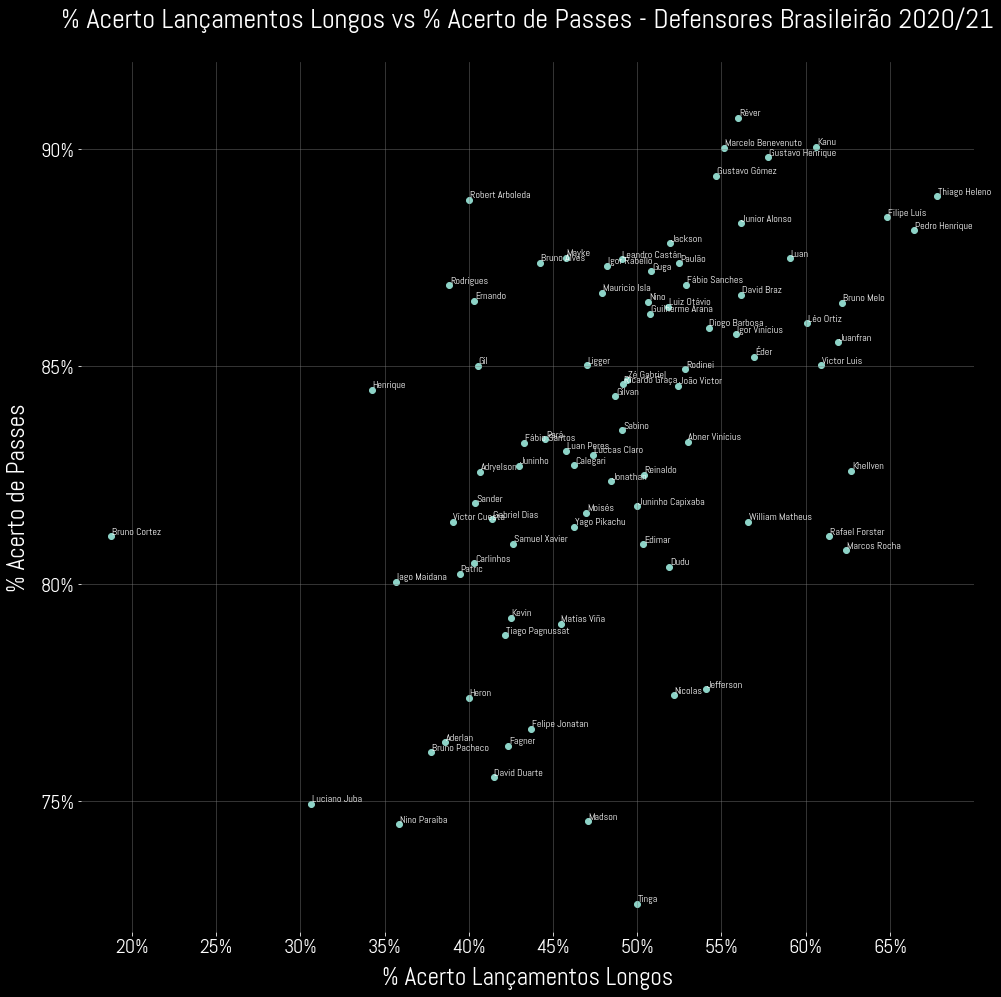

In [35]:
## Defining style and properties
fig,ax = plt.subplots(figsize=(16,16))

#Defining the scatter
plt.scatter(df_defenders['accurateLongBallsPercentage'],df_defenders['accuratePassesPercentage'])

#Annotation on the scatter points
for i in range (df_defenders.shape[0]):
    plt.text(x=df_defenders.accurateLongBallsPercentage[i] + 0.05,
             y=df_defenders.accuratePassesPercentage[i] + 0.05,
             s = df_defenders.player[i])
    
#Grid and axis properties       
plt.grid(alpha = 0.5, color ='gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax.xaxis.set_ticks(np.arange(15,70,5))
ax.yaxis.set_ticks(np.arange(70,100,5))
plt.ylim(72,92)
plt.xlim(17,70)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

#Texts
plt.title('% Acerto Lançamentos Longos vs % Acerto de Passes - Defensores Brasileirão 2020/21', fontsize = 28, pad=35)
plt.xlabel(xlabel='% Acerto Lançamentos Longos', fontsize = 25, labelpad=10)
plt.ylabel(ylabel='% Acerto de Passes', fontsize = 25, labelpad=10)

#Show
plt.show()

#Save
fig.savefig('LancamentosLongosvsAcertodePasses.png')

C:\Users\bcpython\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



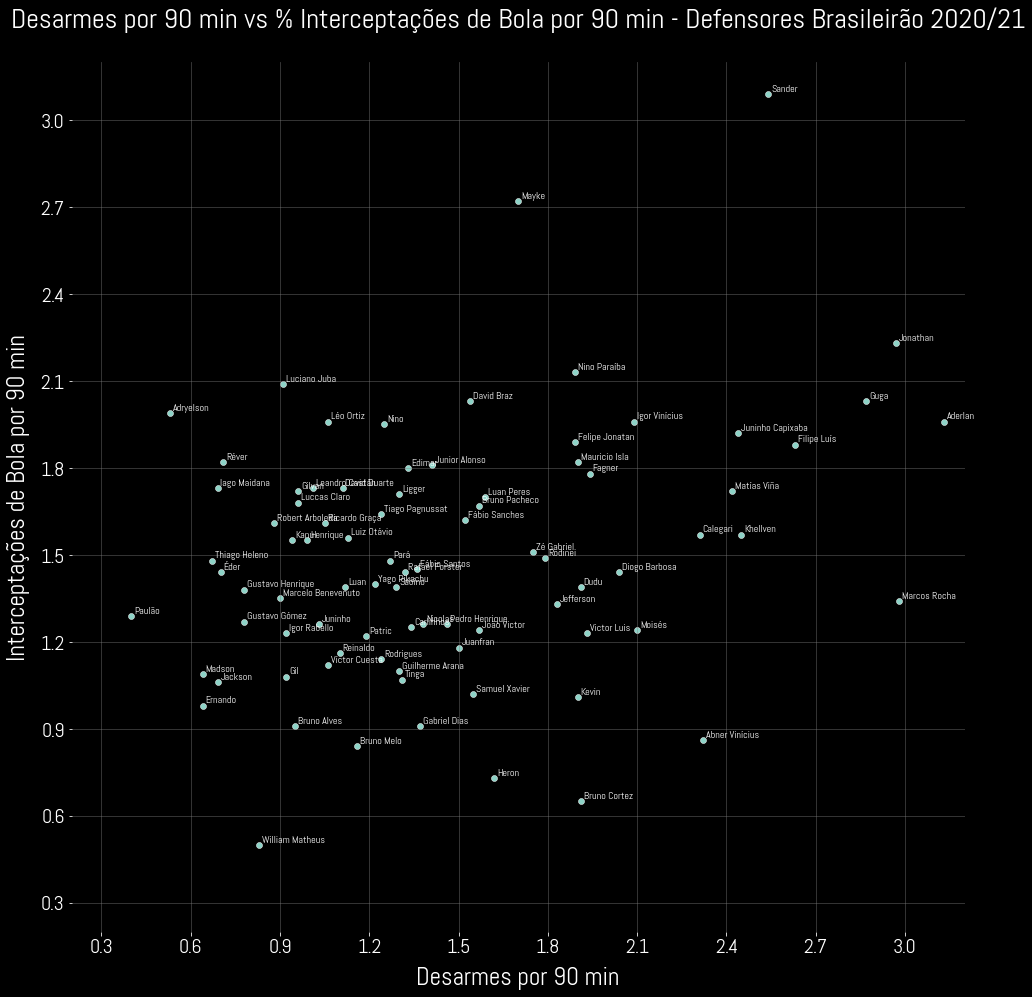

In [37]:
## Defining style and properties
fig,ax = plt.subplots(figsize=(16,16))

#Defining the scatter
sns.scatterplot(df_defenders['tackles'],df_defenders['interceptions'])

#Annotation on the scatter points
for i in range (df_defenders.shape[0]):
    plt.text(x=df_defenders.tackles[i] + 0.01,
             y=df_defenders.interceptions[i] + 0.01,
             s = df_defenders.player[i])
    
#Grid and axis properties    
plt.grid(alpha = 0.5, color ='gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_ticks(np.arange(0,3.6,.3))
ax.yaxis.set_ticks(np.arange(0,3.6,.3))
plt.ylim(.2,3.2)
plt.xlim(.2,3.2)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

#Texts
plt.title('Desarmes por 90 min vs % Interceptações de Bola por 90 min - Defensores Brasileirão 2020/21', fontsize = 28, pad=35)
plt.xlabel(xlabel='Desarmes por 90 min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Interceptações de Bola por 90 min', fontsize = 25, labelpad = 10)

#Show
plt.show()

#Save
fig.savefig('DesarmesvsInterceptacoes.png')

C:\Users\bcpython\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



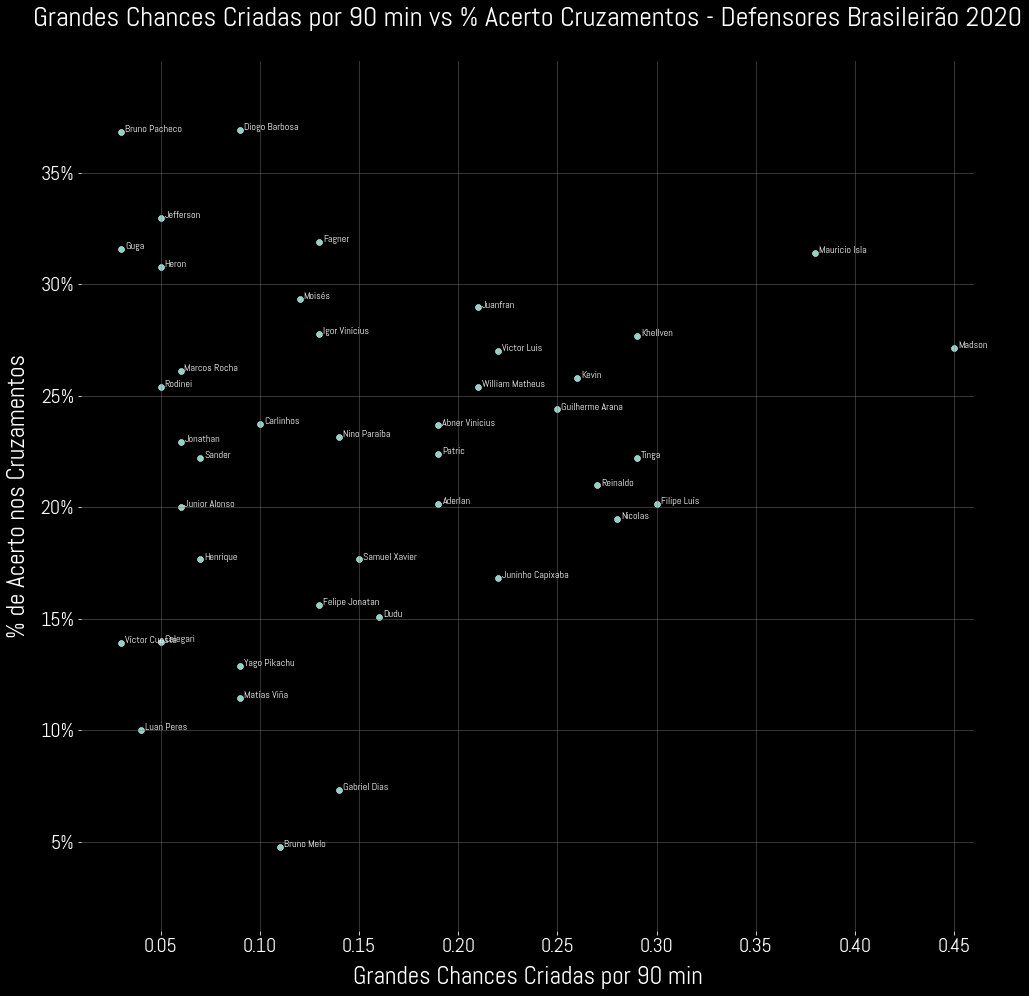

In [38]:
# Defining filters (exclude the outliers) and properties
df_defenders_sup = df_defenders[(df_defenders['bigChancesCreated'] > 0)
                                & (df_defenders['accurateCrossesPercentage'] > 0)
                                & (df_defenders['accurateCrossesPercentage'] < 40)].reset_index(drop=True)
fig,ax = plt.subplots(figsize=(16,16))

#Defining the scatter
sns.scatterplot(df_defenders_sup['bigChancesCreated'],df_defenders_sup['accurateCrossesPercentage'])

#Annotation on the scatter points
for i in range (df_defenders_sup.shape[0]):
    plt.text(x=df_defenders_sup.bigChancesCreated[i] + 0.002,
             y=df_defenders_sup.accurateCrossesPercentage[i] + 0.001,
             s = df_defenders_sup.player[i])
    
#Grid and axis properties      
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax.xaxis.set_ticks(np.arange(0,.5,.05))
ax.yaxis.set_ticks(np.arange(5,40,5))
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.ylim(1,40)
plt.xlim(.01,.46)

#Texts
plt.title('Grandes Chances Criadas por 90 min vs % Acerto Cruzamentos - Defensores Brasileirão 2020/21', fontsize = 28, pad =35 )
plt.xlabel(xlabel='Grandes Chances Criadas por 90 min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='% de Acerto nos Cruzamentos', fontsize = 25, labelpad = 10)

#Show
plt.show()

#Save
fig.savefig('ChancesCriadasvsAcertoCruzamentos.png')

In [17]:
labelszag1 = ['player','tackles', 'interceptions', 'dribbledPast' , 'fouls']
labelszag2 = ['player','groundDuelsWonPercentage', 'aerialDuelsWonPercentage', 'accuratePassesPercentage', 'accurateLongBallsPercentage']
labelslat1 = ['player','tackles', 'interceptions', 'dribbledPast','fouls']
labelslat2 = ['player','groundDuelsWonPercentage', 'aerialDuelsWonPercentage', 'accuratePassesPercentage', 'accurateLongBallsPercentage', 'accurateCrossesPercentage']

In [18]:
#Here we pick some star players in each position to compare them on the radar chart

df_le = df_defenders[(df_defenders['player'] == 'Filipe Luís')
                                | (df_defenders['player'] == 'Guilherme Arana')
                                | (df_defenders['player'] == 'Matías Viña')].reset_index(drop=True)
df_le_vw1 = df_le[labelslat1]
df_le_vw2 = df_le[labelslat2]

In [19]:
df_ld = df_defenders[(df_defenders['player'] == 'Fagner')
                                | (df_defenders['player'] == 'Mauricio Isla')
                                | (df_defenders['player'] == 'Guga')].reset_index(drop=True)
df_ld_vw1 = df_ld[labelslat1]
df_ld_vw2 = df_ld[labelslat2]

In [20]:
df_zd = df_defenders[(df_defenders['player'] == 'Pedro Henrique')
                                | (df_defenders['player'] == 'Réver')
                                | (df_defenders['player'] == 'Nino')].reset_index(drop=True)
df_zd_vw1 = df_zd[labelszag1]
df_zd_vw2 = df_zd[labelszag2]

In [21]:
df_ze = df_defenders[(df_defenders['player'] == 'Thiago Heleno')
                                | (df_defenders['player'] == 'Gustavo Gómez')
                                | (df_defenders['player'] == 'Junior Alonso')].reset_index(drop=True)
df_ze_vw1 = df_ze[labelszag1]
df_ze_vw2 = df_ze[labelszag2]

In [22]:
categories = labelslat1[1:]
categories = [*categories, categories[0]]

players = df_le_vw1.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 500,
    title=go.layout.Title(text = 'Comparação Laterais Esquerdos - Visão 1'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [23]:
categories = labelslat2[1:]
categories = [*categories, categories[0]]

players = df_le_vw2.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 500,
    title=go.layout.Title(text = 'Comparação Laterais Esquerdos - Visão 2'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [24]:
categories = labelslat1[1:]
categories = [*categories, categories[0]]

players = df_ld_vw1.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 500,
    title=go.layout.Title(text = 'Comparação Laterais Direitos - Visão 1'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [25]:
categories = labelslat2[1:]
categories = [*categories, categories[0]]

players = df_ld_vw2.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 500,
    title=go.layout.Title(text = 'Comparação Laterais Direitos - Visão 2'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [26]:
categories = labelszag1[1:]
categories = [*categories, categories[0]]

players = df_zd_vw1.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 500,
    title=go.layout.Title(text = 'Comparação Zagueiros Pela Direita - Visão 1'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [27]:
categories = labelszag2[1:]
categories = [*categories, categories[0]]

players = df_zd_vw2.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 700,
    title=go.layout.Title(text = 'Comparação Zagueiros pela Direita - Visão 2'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [28]:
categories = labelszag1[1:]
categories = [*categories, categories[0]]

players = df_ze_vw1.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 500,
    title=go.layout.Title(text = 'Comparação Zagueiros Pela Esquerda - Visão 1'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [29]:
categories = labelszag2[1:]
categories = [*categories, categories[0]]

players = df_ze_vw2.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 500,
    title=go.layout.Title(text = 'Comparação Zagueiros pela Esquerda - Visão 2'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)